In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skewnorm,t,binom,chi2,poisson,expon 
import seaborn as sns
%matplotlib inline

In [45]:
df=pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [46]:
df.drop(['Unnamed: 0','vin'],axis=1,inplace=True)
df.head()

,price,brand,model,year,title_status,mileage,color,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,167763266,florida,usa,22 hours left


In [100]:
df.describe()

,price,year,mileage,lot,count
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03,2499.0
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08,1.0
std,12116.094936,3.442656,5.970552e+04,2.038772e+05,0.0
min,0.000000,1973.000000,0.000000e+00,1.593488e+08,1.0
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08,1.0
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08,1.0
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08,1.0
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08,1.0


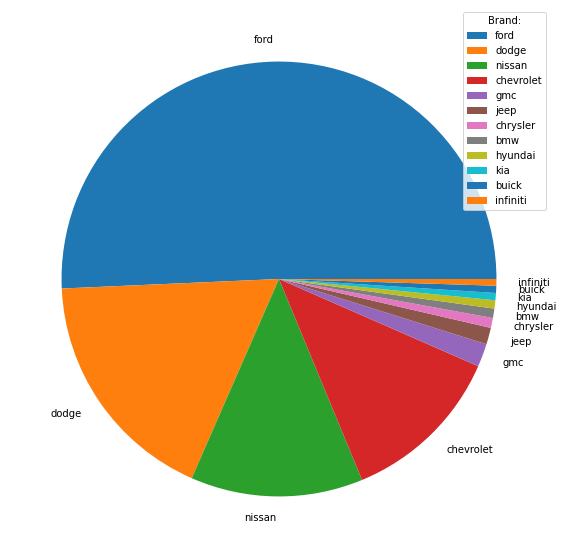

In [101]:
plt.figure(figsize=(10,10))
key = df['brand'].value_counts().keys()
plt.pie( df['brand'].value_counts().values[:12], labels = key[:12])
plt.legend(title = "Brand:")

In [112]:
dc=df.groupby('brand')['price'].agg([np.mean])
dc.columns=['mean_price']
dc = dc.sort_values(by='mean_price')
print(dc)

                   mean_price
brand                        
peterbilt          400.000000
jaguar            2800.000000
heartland         2966.000000
hyundai           5203.200000
honda             6127.500000
toyota            6300.000000
acura             7266.666667
mazda             8000.000000
gmc              10657.380952
jeep             10933.833333
ram              11050.000000
kia              11123.846154
nissan           12065.820513
infiniti         13098.333333
chrysler         13686.111111
audi             13981.250000
dodge            17781.988426
lincoln          18150.000000
chevrolet        18669.952862
buick            19715.769231
ford             21666.888259
cadillac         24941.000000
bmw              26397.058824
mercedes-benz    28704.000000
land             28900.000000
maserati         30300.000000
lexus            33220.000000
harley-davidson  54680.000000


In [48]:
df['count'] = 1
data_brand=df.groupby(["brand","model"]).sum()['count']
data_brand

brand      model  
acura      door       2
           mdx        1
audi       5          1
           door       2
           q5         1
                     ..
nissan     xd         1
           xterra     1
peterbilt  truck      4
ram        door       1
toyota     cruiser    1
Name: count, Length: 180, dtype: int64

In [113]:
beneficiary_data=df.pivot_table("count",index="brand",columns="model",aggfunc='sum')
beneficiary_data=beneficiary_data.fillna(0)
beneficiary_data=beneficiary_data.astype(int)
ford_data=beneficiary_data.T[["ford"]]
ford_data= ford_data[ford_data['ford'] != 0]
chevrolet_data = beneficiary_data.T[['chevrolet']]
#chevrolet_data = chevrolet_data[(chevrolet_data.T != 0).any()]
chevrolet_data= chevrolet_data[chevrolet_data['chevrolet'] != 0]
dodge_data = beneficiary_data.T[['dodge']]
dodge_data = dodge_data[dodge_data['dodge']!=0]
#dodge_data = dodge_data[(dodge_data.T != 0).any()]
nissan_data = beneficiary_data.T[['nissan']]
nissan_data= nissan_data[nissan_data['nissan']!=0]
top_4 = pd.concat([nissan_data, dodge_data, chevrolet_data, ford_data])
#nissan_data = nissan_data[(nissan_data.T != 0).any()]
#print(ford_data)
#print(chevrolet_data)
#print(dodge_data)
#print(nissan_data)

# Bar plot for companies with respect to amount of products sold

<Figure size 1080x360 with 0 Axes>

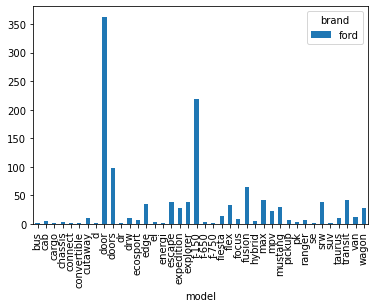

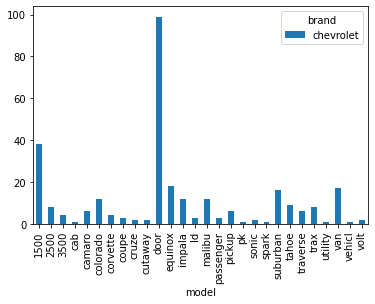

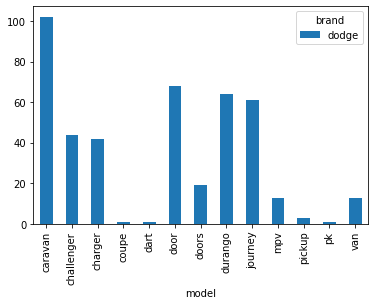

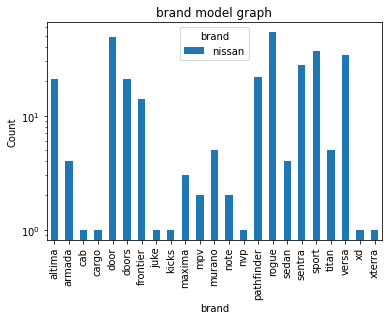

In [7]:
plt.figure(figsize=(15,5))
ford_data.plot(kind='bar')
chevrolet_data.plot(kind='bar')
dodge_data.plot(kind='bar')
nissan_data.plot(kind='bar')
# labels for x & y axis
plt.xlabel('brand')
plt.ylabel('Count')
  
# title of plot
plt.title('brand model graph')
plt.yscale('log')
plt.show()

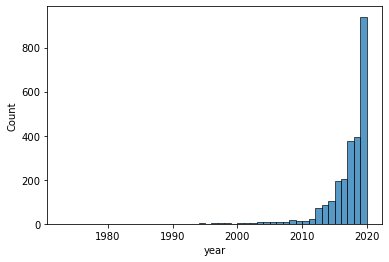

In [99]:
ax = sns.histplot(data=df, x='year', binwidth=1)

In [9]:
data_year=df.groupby(["year","brand"]).sum()['count']
data_year.head(70)

year  brand    
1973  chevrolet    1
1984  ford         1
1993  gmc          1
1994  ford         2
1995  chevrolet    1
                  ..
2011  chrysler     1
      dodge        2
      ford         7
      gmc          3
      heartland    1
Name: count, Length: 70, dtype: int64

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_year)

year  brand          
1973  chevrolet            1
1984  ford                 1
1993  gmc                  1
1994  ford                 2
1995  chevrolet            1
1996  ford                 2
1997  ford                 2
1998  chevrolet            1
      ford                 3
1999  jeep                 1
2000  bmw                  1
      cadillac             1
      chrysler             1
      ford                 1
2001  chevrolet            1
      dodge                1
      ford                 2
      jeep                 1
2002  dodge                1
      ford                 1
2003  chevrolet            3
      ford                 4
      gmc                  1
      honda                1
2004  chevrolet            3
      ford                 2
      gmc                  1
2005  audi                 1
      chevrolet            1
      chrysler             1
      dodge                1
      ford                 1
      lincoln              1
2006  buick          

Text(0, 0.5, 'No. of cars')

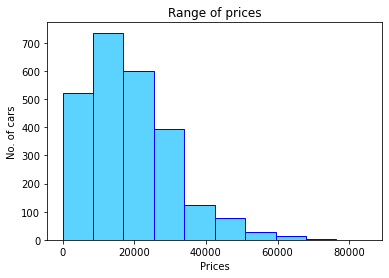

In [11]:
plt.hist(df['price'], color = '#5cd3ff', edgecolor = 'blue',bins=10)

# Add labels
plt.title('Range of prices')
plt.xlabel('Prices')
plt.ylabel('No. of cars')

(array([2492.,    0.,    0.,    0.,    0.,    7.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <BarContainer object of 6 artists>)

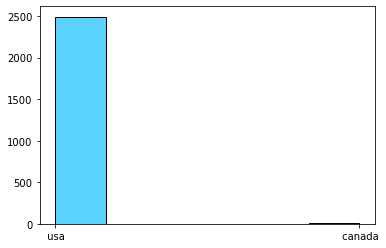

In [104]:
plt.hist(df['country'], color = '#5cd3ff', edgecolor = 'black',bins=6)

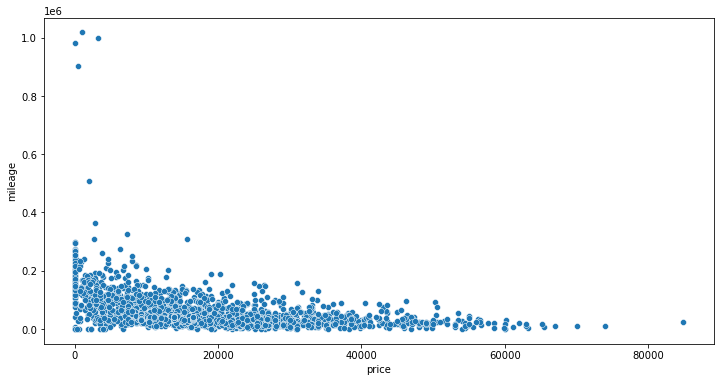

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['price'], y=df['mileage']);

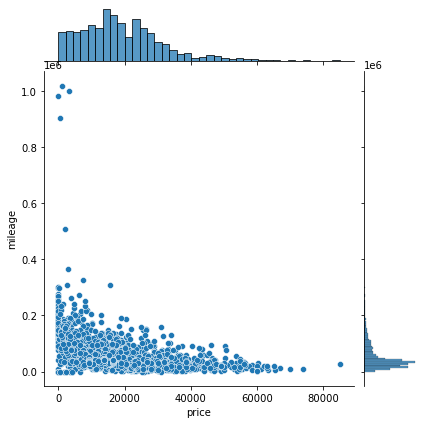

In [15]:
sns.jointplot(x=df['price'], y=df['mileage']);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'peterbilt'),
  Text(1, 0, 'heartland'),
  Text(2, 0, 'jaguar'),
  Text(3, 0, 'acura'),
  Text(4, 0, 'hyundai'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'toyota'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'audi'),
  Text(9, 0, 'gmc'),
  Text(10, 0, 'jeep'),
  Text(11, 0, 'ram'),
  Text(12, 0, 'nissan'),
  Text(13, 0, 'kia'),
  Text(14, 0, 'infiniti'),
  Text(15, 0, 'dodge'),
  Text(16, 0, 'chevrolet'),
  Text(17, 0, 'lincoln'),
  Text(18, 0, 'chrysler'),
  Text(19, 0, 'buick'),
  Text(20, 0, 'mercedes-benz'),
  Text(21, 0, 'ford'),
  Text(22, 0, 'land'),
  Text(23, 0, 'cadillac'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'maserati'),
  Text(26, 0, 'lexus'),
  Text(27, 0, 'harley-davidson')])

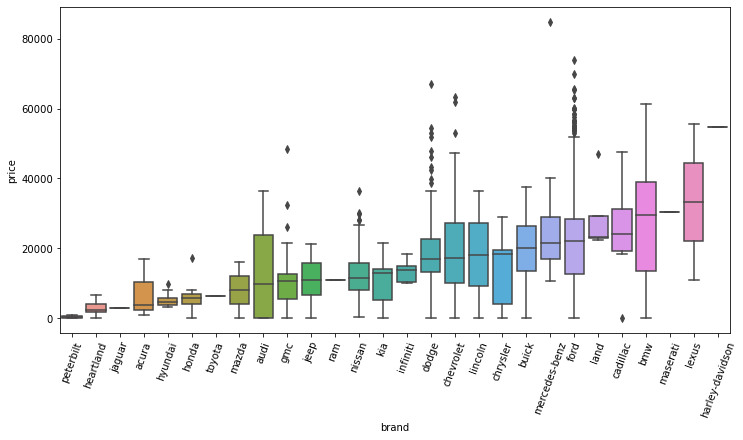

In [16]:
plt.figure(figsize=(12,6))
sorted_nb = df.groupby(['brand'])['price'].median().sort_values()
sns.boxplot(x=df['brand'], y=df['price'], order=list(sorted_nb.index))
plt.xticks(rotation=70)

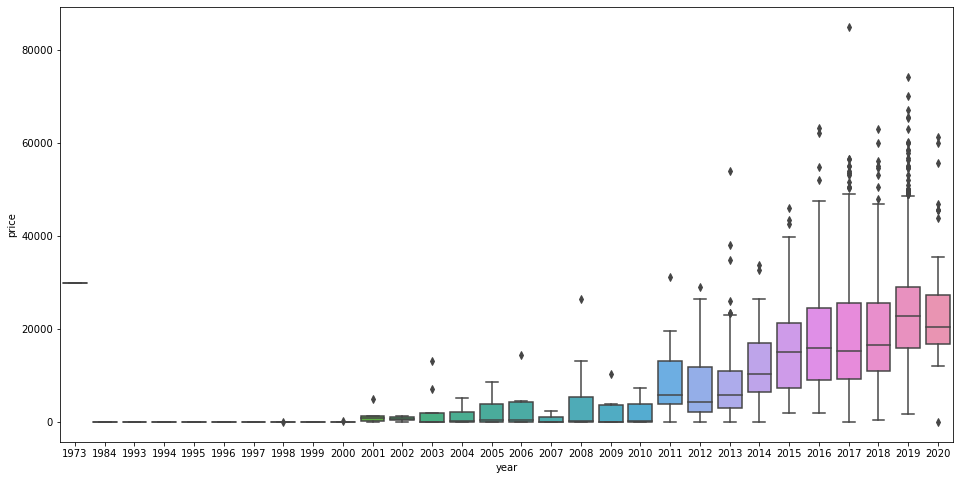

In [17]:
data = df[['price','year']]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='year', y="price", data=data)

<AxesSubplot:ylabel='price'>

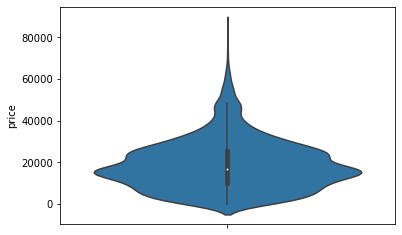

In [18]:
sns.violinplot(y=df["price"])

<AxesSubplot:>

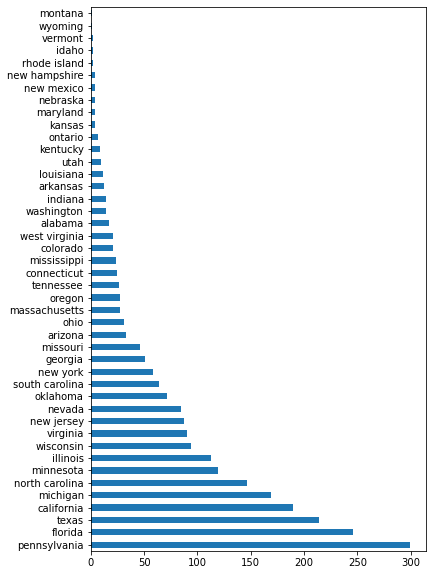

In [106]:
df['state'].value_counts().head(2499).plot(kind='barh', figsize=(6,10))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'black'),
  Text(1, 0, 'silver'),
  Text(2, 0, 'blue'),
  Text(3, 0, 'red'),
  Text(4, 0, 'white'),
  Text(5, 0, 'gray'),
  Text(6, 0, 'orange'),
  Text(7, 0, 'brown'),
  Text(8, 0, 'no_color'),
  Text(9, 0, 'gold'),
  Text(10, 0, 'charcoal'),
  Text(11, 0, 'turquoise'),
  Text(12, 0, 'beige'),
  Text(13, 0, 'green'),
  Text(14, 0, 'dark blue'),
  Text(15, 0, 'maroon'),
  Text(16, 0, 'phantom black'),
  Text(17, 0, 'yellow'),
  Text(18, 0, 'color:'),
  Text(19, 0, 'light blue'),
  Text(20, 0, 'toreador red'),
  Text(21, 0, 'bright white clearcoat'),
  Text(22, 0, 'billet silver metallic clearcoat'),
  Text(23, 0, 'black clearcoat'),
  Text(24, 0, 'jazz blue pearlcoat'),
  Text(25, 0, 'purple'),
  Text(26, 0, 'ruby red metallic tinted clearcoat'),
  Text(2

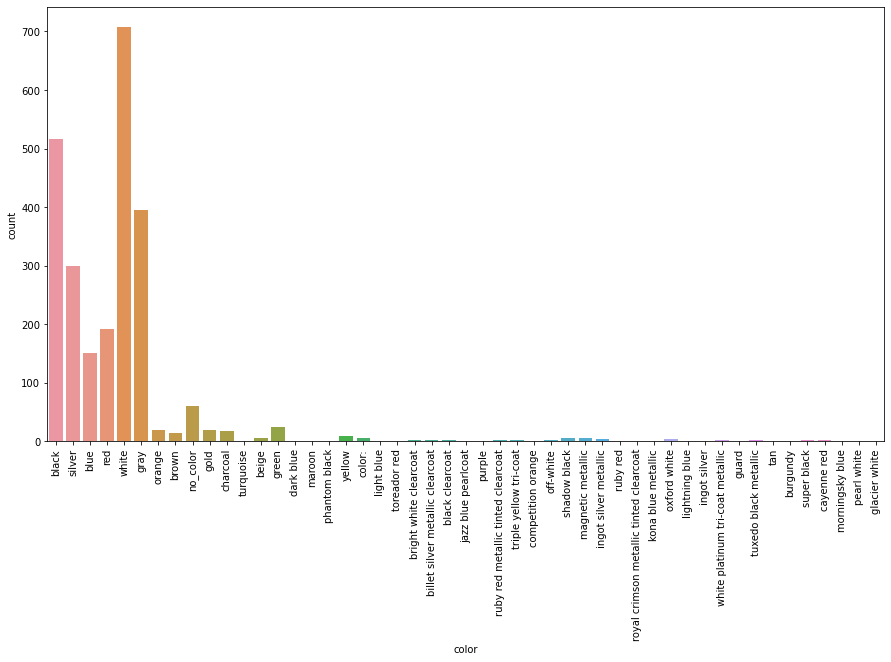

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(df['color']);
plt.xticks(rotation=90)

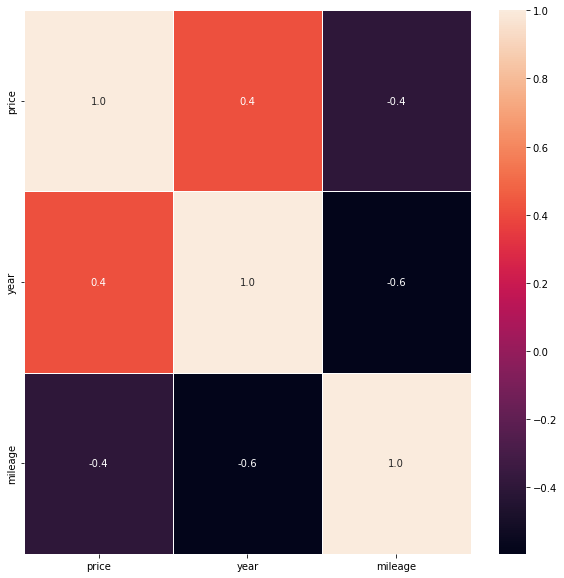

In [110]:
#correlation map
temp_data = df.drop(['count'], axis = 1)
temp_data = temp_data.drop(['lot'], axis=1)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(temp_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

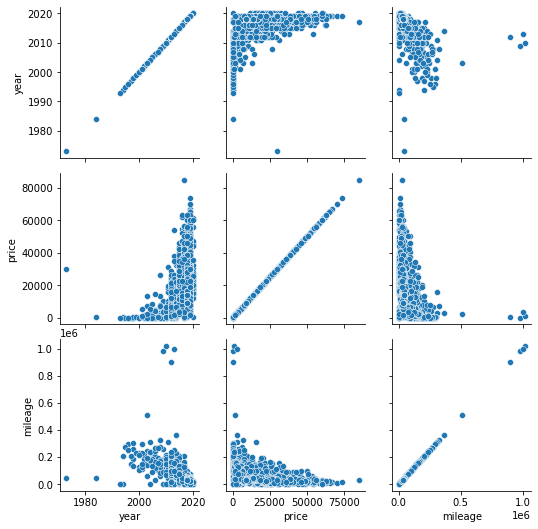

In [92]:
g = sns.PairGrid(df[["year","price","mileage"]])
g.map(sns.scatterplot)

         brand       state   count
28   chevrolet     arizona       0
29   chevrolet    arkansas    4125
30   chevrolet  california  313525
31   chevrolet    colorado     300
32   chevrolet     florida  294040
..         ...         ...     ...
219     nissan   tennessee   74350
220     nissan       texas  106700
221     nissan     vermont   14996
222     nissan    virginia  149400
223     nissan   wisconsin   68000

[134 rows x 3 columns]


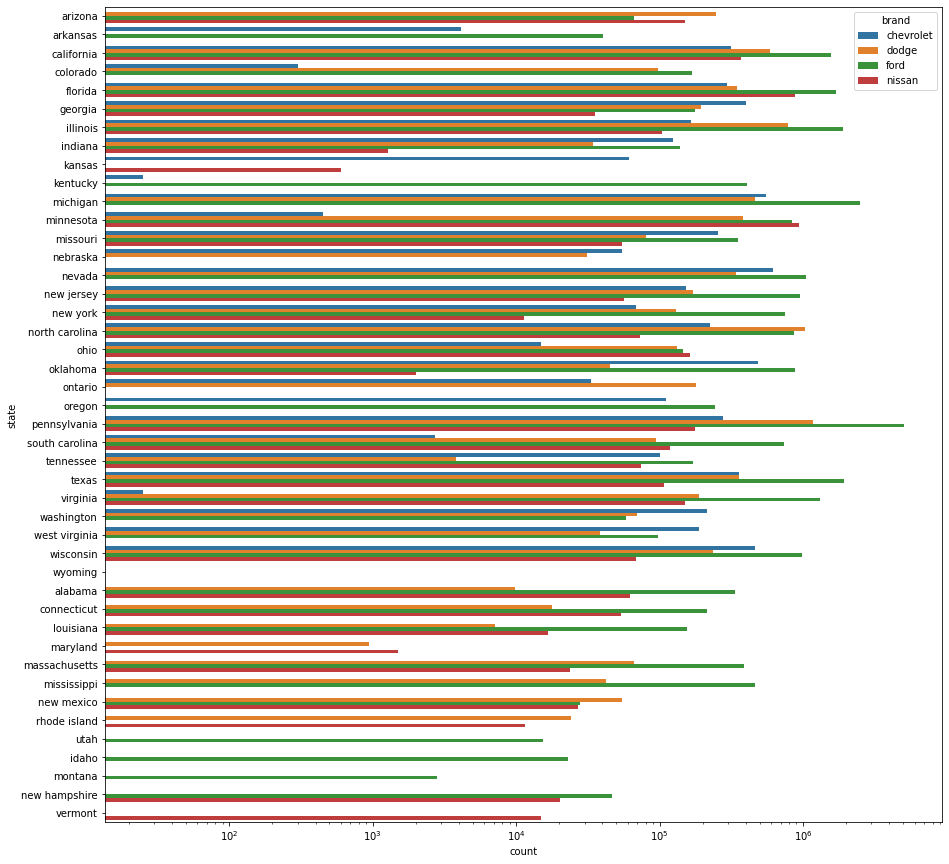

In [35]:
plt.figure(figsize=(15,15))
beneficiary_data=df.groupby(["brand","state"]).agg(count=("price", 'sum'))
beneficiary_data=beneficiary_data.reset_index()
idx=beneficiary_data["brand"].isin(["ford","dodge",'nissan','chevrolet'])
key = beneficiary_data['brand'].value_counts()
beneficiary_data=beneficiary_data[idx]
print(beneficiary_data)


# plot barplot
ax=sns.barplot(x="count",
           y="state",
           hue="brand",
           data=beneficiary_data)

ax.set_xscale("log")


In [28]:
df.head()

,price,brand,model,year,title_status,mileage,color,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,167763266,florida,usa,22 hours left


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<AxesSubplot:xlabel='year', ylabel='Density'>

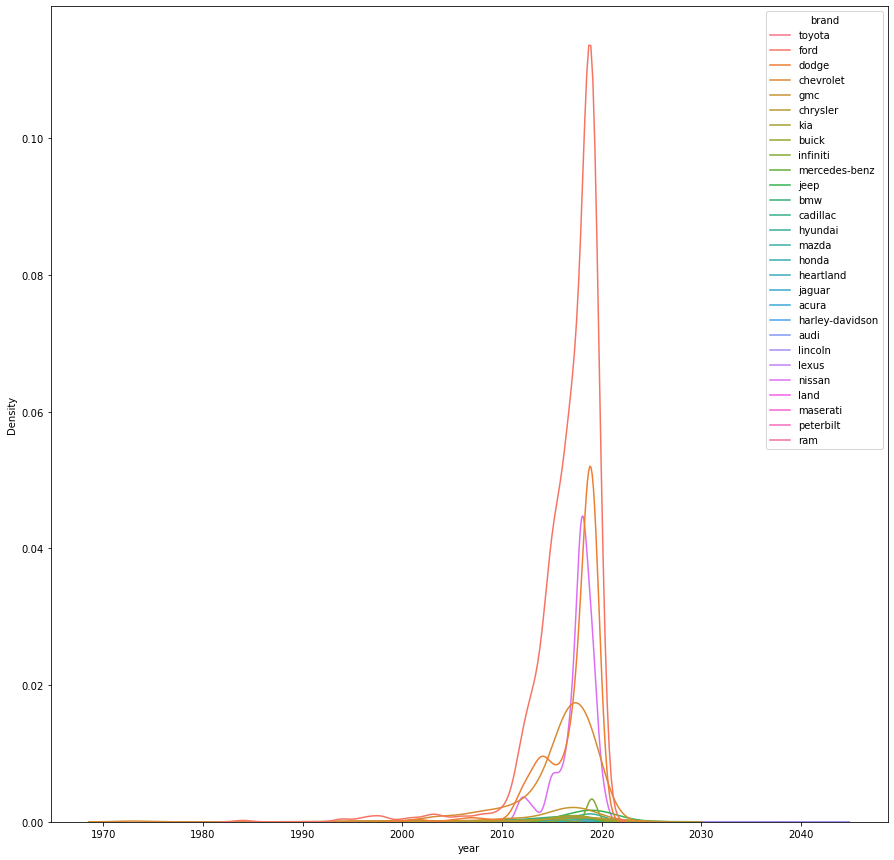

In [46]:
plt.figure(figsize=(15,15))
sns.kdeplot(data=df, x="year", hue = "brand")

In [34]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Mean of the data:  count               NaN
lot                 NaN
mileage             NaN
price     -9.960464e-17
year                NaN
dtype: float64
Standard deviation of the data:  count      NaN
lot        NaN
mileage    NaN
price      1.0
year       NaN
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Text(0.5, 0, 'z-score')

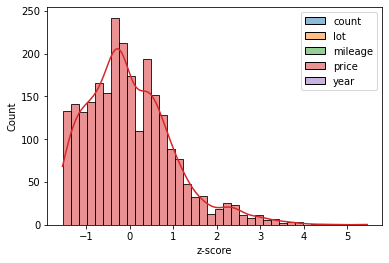

In [94]:
new_data = df.drop(['year'], axis=1)
z_score=(data-np.mean(new_data))/np.std(new_data)
print("Mean of the data: ",np.mean(z_score))
print("Standard deviation of the data: ",np.std(z_score))
sns.histplot(z_score,kde=True)
plt.xlabel("z-score")

# A/B Testing

In [89]:
mean_ford = df[df['brand'] == 'ford'].price.mean()
mean_dodge = df[df['brand'] == 'dodge'].price.mean()
print(mean_ford)
print(mean_dodge)
print("Difference between mean price is : ")
m = mean_ford - mean_dodge
print(m)

21666.888259109313
17781.988425925927
Difference between mean price is : 
3884.8998331833864
